## Wagner 2003 - der Laserstrahl und seine Interaktion mit der Erdoberfläche
[Link](https://drive.google.com/drive/folders/1VgwUhkDOaZZZA309OB-IS88gZsQBUSsz). Relevante physikalische Grundlagen. Interessant: Interaktion des Laserstrahls mit der Erdoberfläche / Streuquerschnitt verschiedener Objekte und Impulsform.

Für die Streuung an einer Fläche erhält man
    $$\sigma_{\text{Fläche}} = \pi \rho_{\text{Fläche}} R^2 \beta_S^2 \propto R^2.$$
    
Und für die Impulsform:
        $$P_E(t) = \int_{R_0}^{R_1} \frac{D_E^2}{4\pi R^4 \beta_S^2} \eta_{\text{SYS}} \eta_{\text{ATM}} P_S\left(t-\frac{2R}{v_g}\right)\sigma(R) dR$$

die vereinfacht werden kann, indem alle Konstanten zusammengefasst werden ($\sigma_{\text{Fläche}} = \sigma(R)$):
        $$P_E(t) = C \int_{R_0}^{R_1} \frac{1}{R^2}P_S\left(t-\frac{2R}{v_g}\right) dR$$
        
Der Abfall des Signals scheint eher proportional zu $1/t$ statt $e^{-t}$ zu sein (?) Siehe auch:

In [183]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import *
from sympy.abc import tau
from math import pi
R,t,tprime,h = symbols("R t tprime h")

# constants
# values taken from Wagner2003
v = 3*10**8 # [m/s]
R0 = 400 # [m]
R1 = 500
pulselength = 10*10**-9 # [s]
pulseenergy = 100*10**-6 # [J]
D_E = 0.1 # [m]
eta_SYS = 1
eta_ATM = 0.9
pulsepower = pulseenergy/pulselength
beta_S = 10**-3 # [rad]
rho_Flaeche = 0.01
# calculate constant factor from example values
C = rho_Flaeche*D_E**2/4*eta_SYS*eta_ATM

# define sent impulse (rectangle w/ amplitude = pulsepower and signal length = pulselength)
P_S = Piecewise((0, t<=0), (0, t>pulselength), (pulsepower,True))
# define & solve indefinite integral
P_E = C*integrate(1/R**2*P_S.subs(t, t - 2*R/v), R)
# solve for lower and upper bound (R0/R1) respectively
result = P_E.subs(R,R1) - P_E.subs(R,R0)
# print indefinite integral
P_E

2.25e-5*Piecewise((0, R < 150000000.0*t - 1.5), (10000.0/(150000000.0*t - 1.5) - 10000.0/R, R <= 150000000*t), (10000.0/(150000000.0*t - 1.5) - 6.66666666666667e-5/t, True))

sent signal


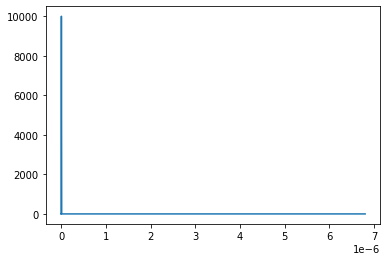

In [180]:
# visualize sent signal
xs = np.linspace(-10**-8,6.8e-06,1000)
ysr = np.array(list(map(lambda val: result.subs(t,val), xs)))
yss = np.array(list(map(lambda val: P_S.subs(t,val), xs)))
print("sent signal")
plt.plot(xs,yss)

received signal


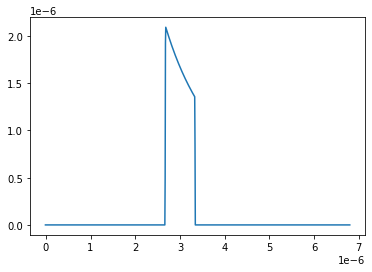

In [181]:
# visualize received signal
print("received signal")
plt.plot(xs,ysr)

Das Signal kommt deutlich geschwächt an: Stärke des ausgehenden Signals ~ $kW$, Stärke des eingehenden Signals ~ $\mu W$. Vergl. dazu auch Wagner2003 (16). Wie verhält es sich bei mehreren Volumen?